**Facebook metrics Data Set**

Link for file:  https://archive.ics.uci.edu/ml/datasets/Facebook+metrics


## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [ ]:
dataset = pd.read_csv('dataset_Facebook.csv')
dataset.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
dataset.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

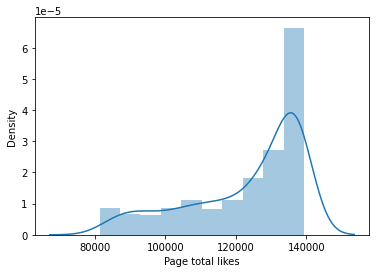

In [ ]:
vis1 = sns.distplot(dataset["Page total likes"])

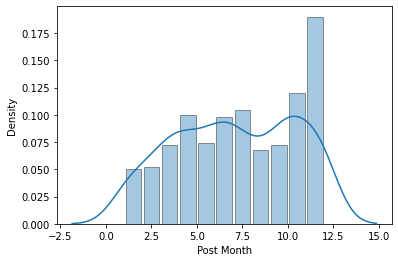

In [ ]:
vis1 = sns.distplot(dataset["Post Month"],  bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] , hist_kws={"rwidth":0.85,'edgecolor':'black'})

In [ ]:
dataset["Post Month"].describe()

count    500.000000
mean       7.038000
std        3.307936
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: Post Month, dtype: float64

In [ ]:
dataset['Paid'].value_counts()

0.0    360
1.0    139
Name: Paid, dtype: int64

In [ ]:
dataset['Post Month'].value_counts()

10    60
7     52
12    50
4     50
6     49
11    45
5     37
9     36
3     36
8     34
2     26
1     25
Name: Post Month, dtype: int64

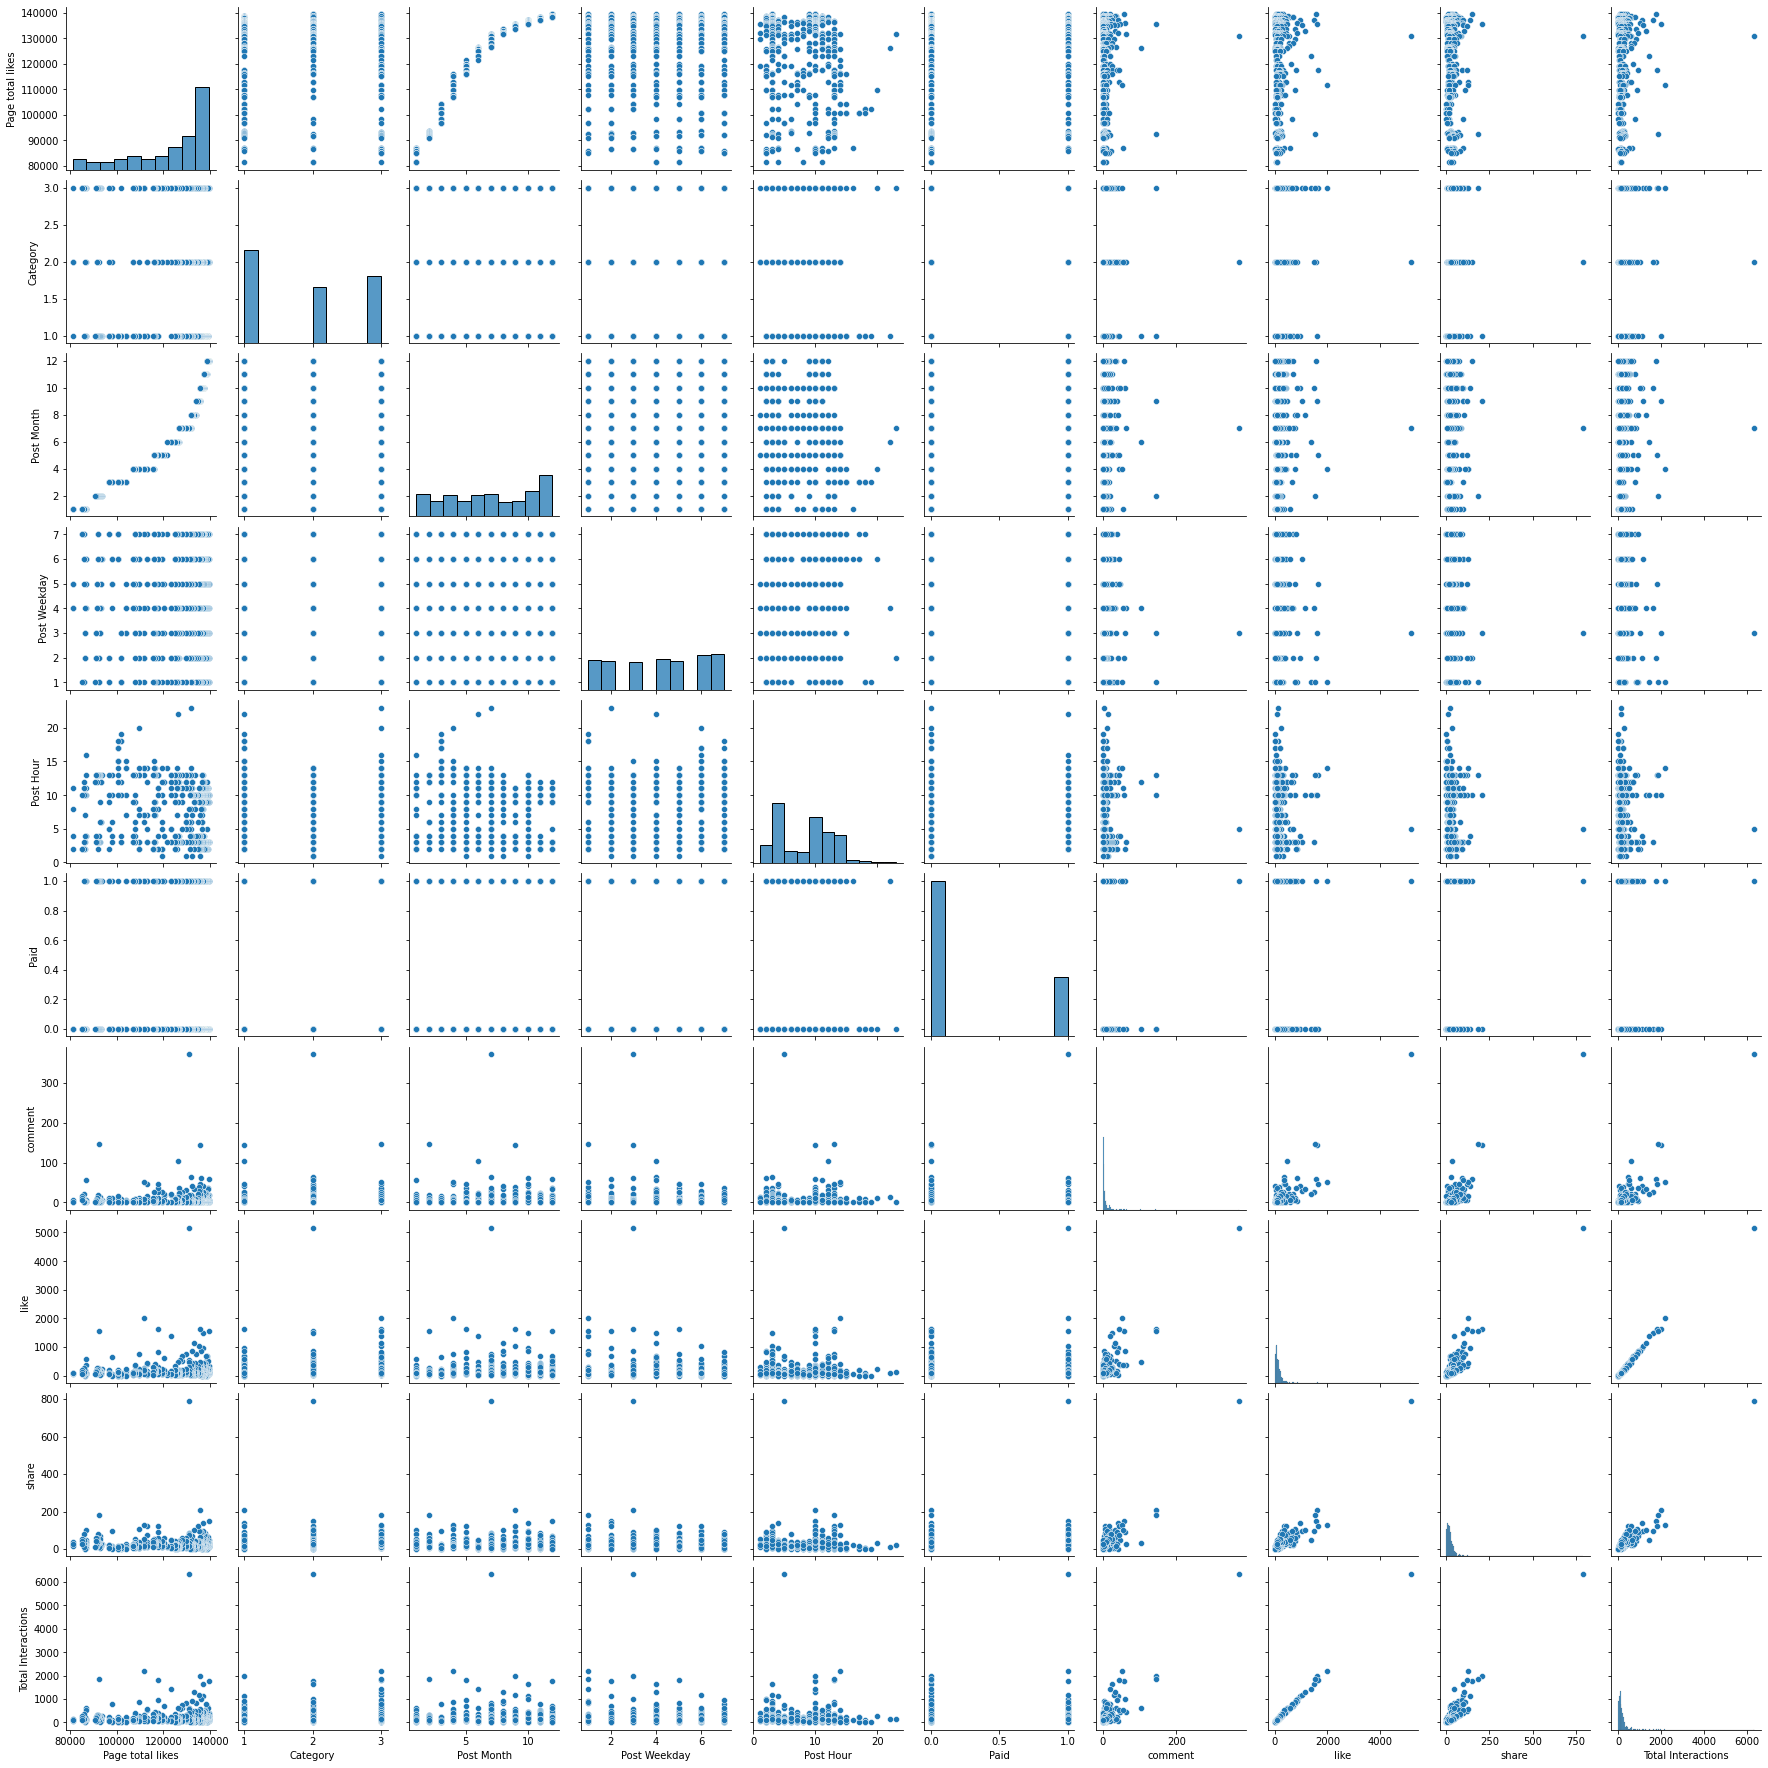

In [ ]:
dataset['Type'] = dataset['Type'].apply(lambda x: str(x))
plotdf = dataset.drop(dataset.columns[7:15],axis =1)
sns.pairplot(data=plotdf)

In [ ]:
dataset['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [ ]:
dataset['like']

0        79.0
1       130.0
2        66.0
3      1572.0
4       325.0
        ...  
495      53.0
496      53.0
497      93.0
498      91.0
499      91.0
Name: like, Length: 500, dtype: float64

In [ ]:
#check if column is null
dataset['like'].isnull().values.any()

True

In [ ]:
dataset['share'].isnull().values.any()

True

In [ ]:
dataset['Paid'].isnull().values.any()

True

In [ ]:
dataset['Type'].isnull().values.any()

False

In [ ]:
#figure out all coulmns with nulls
for r in dataset.columns:
  if (dataset[r].isnull().values.any()):
    print('column {0} has null and had data type {1}'.format(r,dataset['like'].dtypes))

column Paid has null and had data type float64
column like has null and had data type float64
column share has null and had data type float64


In [ ]:
#fill in values with 0 where there was nulls
for r in dataset.columns:
  if (dataset[r].isnull().values.any()):
    dataset[r].fillna(0, inplace=True)
    print('column {0} had null and now has been replaced by 0'.format(r))

column Paid had null and now has been replaced by 0
column like had null and now has been replaced by 0
column share had null and now has been replaced by 0


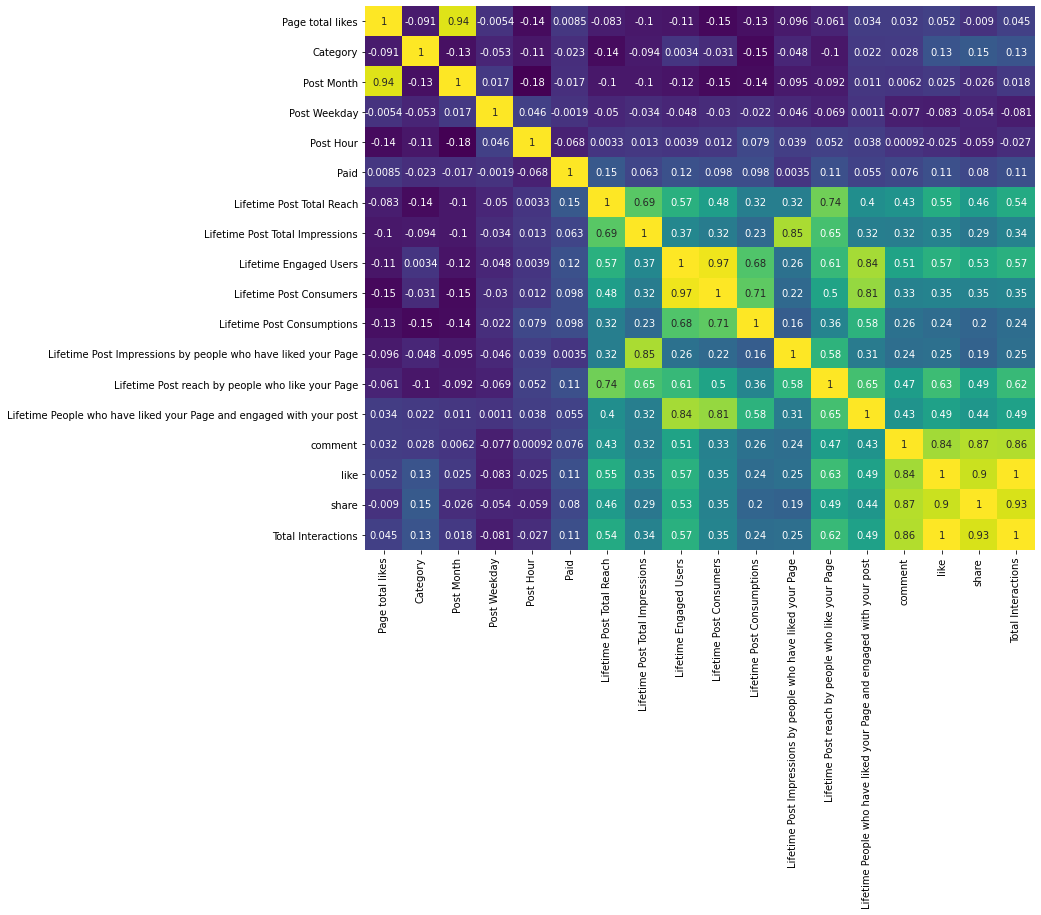

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(dataset.corr(),cmap='viridis',annot=True,cbar=False)


Univariate- Page Likes and Post Likes

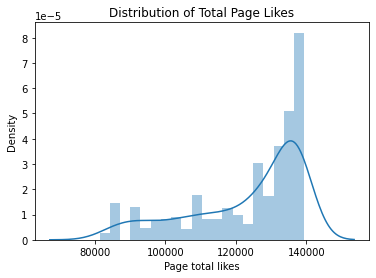

In [ ]:
sns.distplot(dataset['Page total likes'],bins=20)
plt.title("Distribution of Total Page Likes")
plt.show()

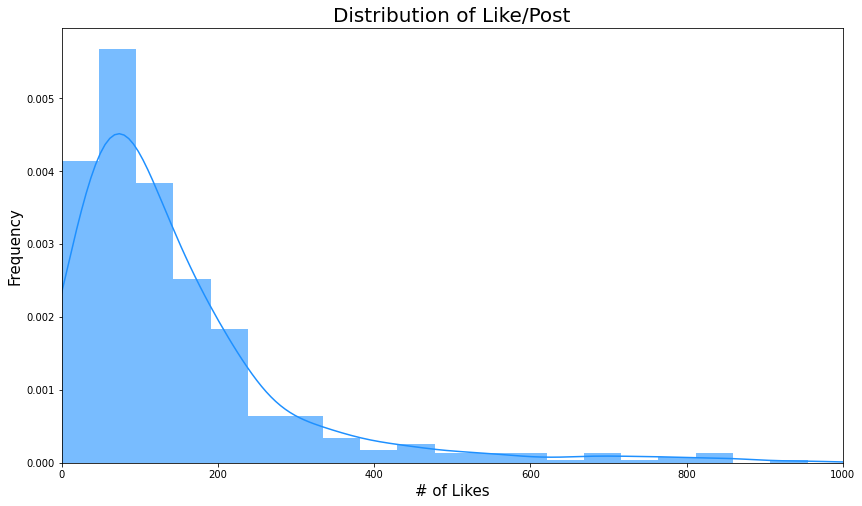

In [ ]:
plt.figure(figsize=(14,8))
sns.distplot(dataset[dataset['like']<1000]['like'],bins=20,color='dodgerblue',hist_kws={'alpha':0.6})
plt.xlim(0,1000)
plt.xlabel("# of Likes",fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Like/Post',fontsize=20)
#plt.savefig('NumLikes.png', bbox_inches='tight')
plt.show()

**Analysis of TIme Categories**

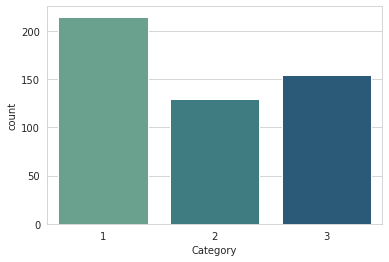

In [ ]:
sns.countplot(dataset['Category'], palette='crest')

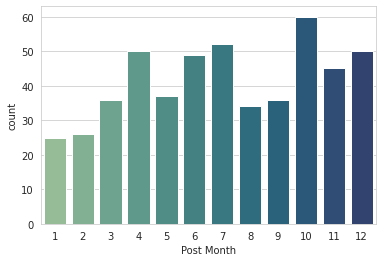

In [ ]:
sns.countplot(dataset['Post Month'], palette='crest')

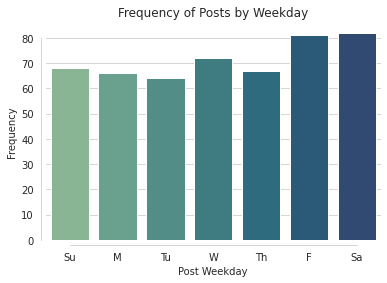

In [ ]:
#from collections import OrderedDict
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(dataset['Post Weekday'], palette='crest')
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset=5, trim=True)
plt.title("Frequency of Posts by Weekday")
plt.show()

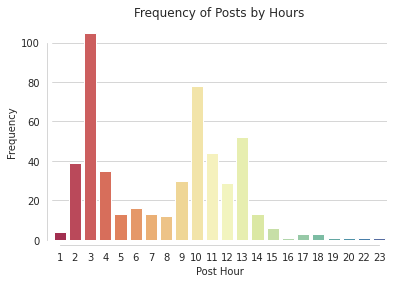

In [ ]:
f, ax = plt.subplots()
sns.countplot(dataset['Post Hour'], palette='Spectral')
#handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
#labels = [0,1,2,3,4,5,6]
#plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset=5, trim=True)
plt.title("Frequency of Posts by Hours")
plt.show()

**Distribution of Likes/Post by Weekday Posted**

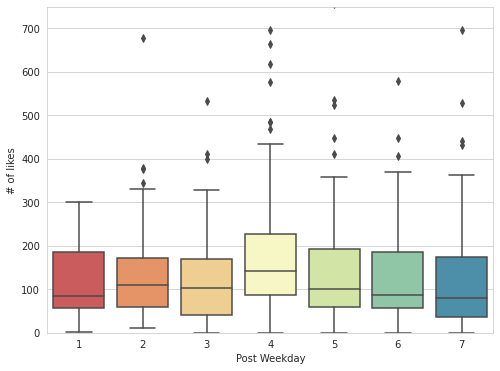

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday', y='like', data=dataset, palette='Spectral')
plt.ylim(0,750)
plt.title("")
plt.ylabel("# of likes")
plt.show()

**Distribution of Post Likes by Weekday Posted bold text**

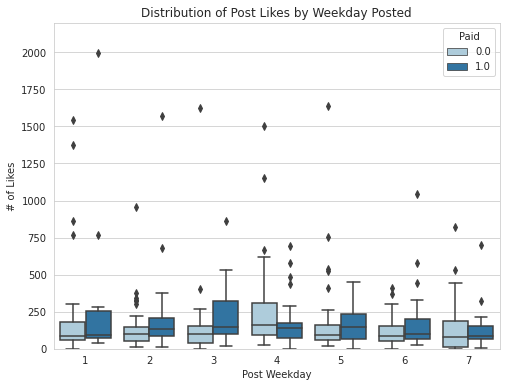

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday',y='like',hue='Paid',data=dataset, palette='Paired')
#sns.color_palette("coolwarm", as_cmap=True)
plt.ylim(0,2200)
plt.title("Distribution of Post Likes by Weekday Posted")
plt.ylabel("# of Likes")
plt.show()

**Distribution of Total Interactions by Weekday Posted**

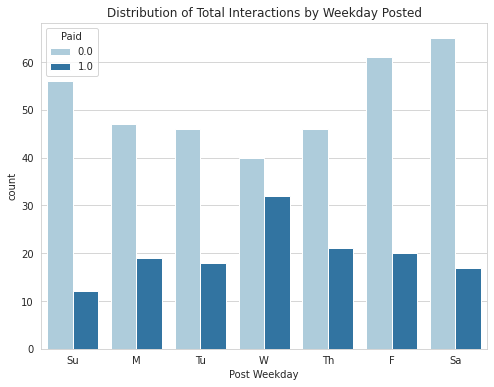

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Weekday',hue='Paid',data=dataset,palette='Paired')
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
plt.title("Distribution of Total Interactions by Weekday Posted")
plt.show()

**Distribution of Post Likes by Hour Posted**

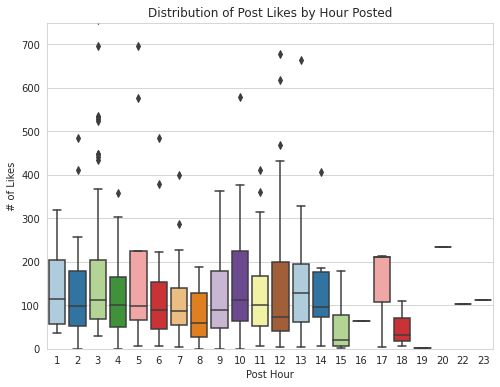

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Hour',y='like',data=dataset,palette='Paired')
plt.ylim(0,750)
plt.title("Distribution of Post Likes by Hour Posted")
plt.ylabel("# of Likes")
plt.savefig('hourBox.png', bbox_inches='tight')
plt.show()

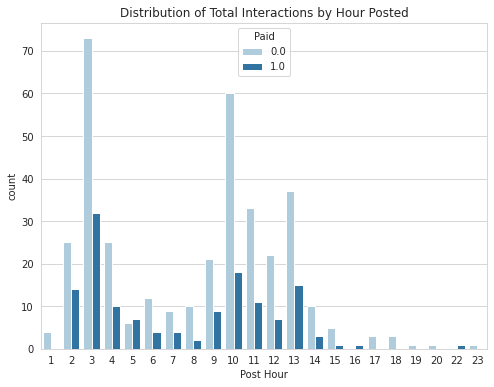

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Hour',hue='Paid',data=dataset,palette='Paired')
plt.title("Distribution of Total Interactions by Hour Posted")
plt.show()

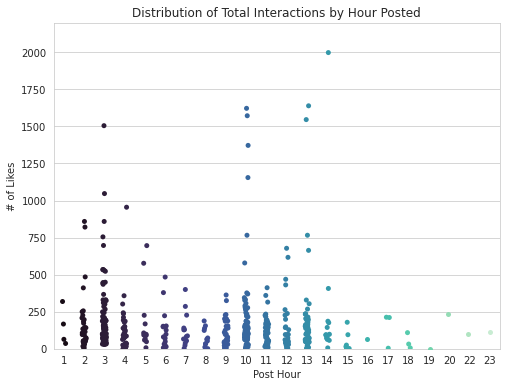

In [ ]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Post Hour',y='like',data=dataset,palette='mako')
plt.ylim(0,2200)
plt.title("Distribution of Total Interactions by Hour Posted")
plt.ylabel("# of Likes")
plt.show()

**Distribution of Total Interactions by Month Posted**

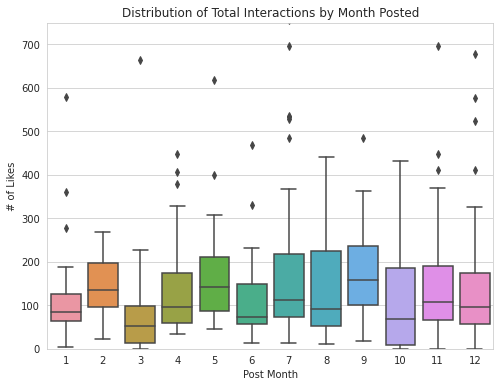

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Month',y='like',data=dataset)
plt.ylim(0,750)
plt.title("Distribution of Total Interactions by Month Posted")
plt.ylabel("# of Likes")
plt.savefig('monthBox.png', bbox_inches='tight')
plt.show()

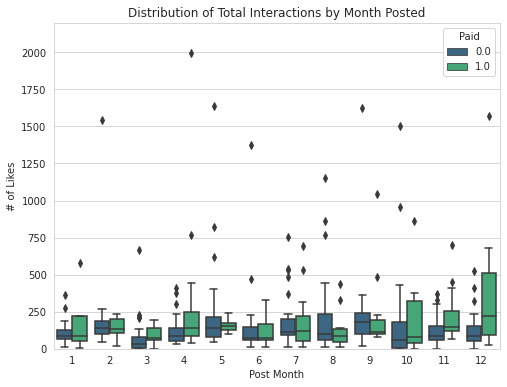

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Month',y='like',hue='Paid',data=dataset,palette='viridis')
plt.ylim(0,2200)
plt.title("Distribution of Total Interactions by Month Posted")
plt.ylabel("# of Likes")
plt.show()

**Total Page Likes vs. Post likes**

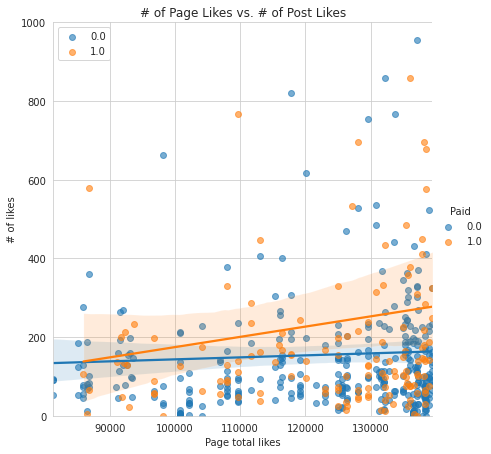

In [ ]:
sns.lmplot(x='Page total likes',y='like', hue='Paid', data=dataset, 
           fit_reg= True, scatter_kws={'alpha':0.6},size=(6))
plt.legend()
plt.ylim(0,1000)
plt.ylabel("# of likes")
plt.title("# of Page Likes vs. # of Post Likes")
plt.show()

From the above you can see that # of likes on a post is directly proportional to total page likes for Paid posts, however, there is no substantial trend for unpaid posts

**Category vs. Likes**

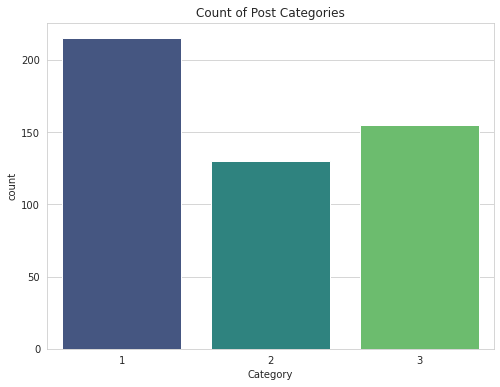

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Category',data=dataset,palette='viridis')
#plt.ylabel("# of Likes")
plt.title("Count of Post Categories")
plt.savefig('catCount.png', bbox_inches='tight')
plt.show()

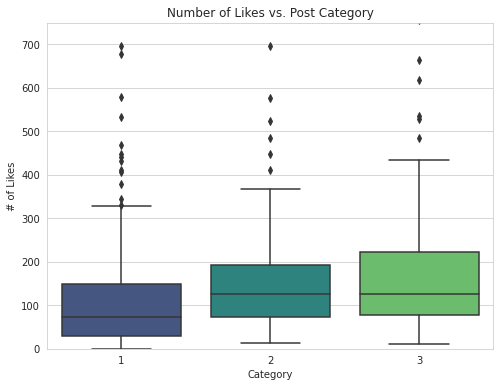

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='like',data=dataset,palette='viridis')
plt.ylim(0,750)
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")
plt.savefig('catBox.png', bbox_inches='tight')
plt.show()

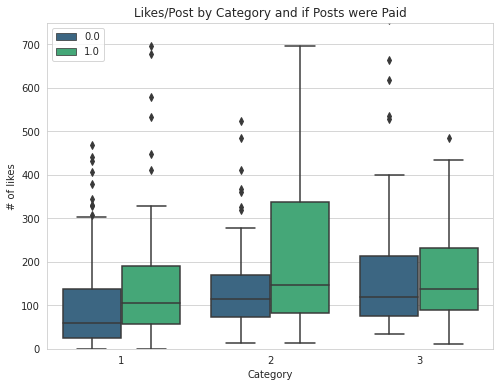

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='like',data=dataset,hue='Paid',palette='viridis')
plt.ylim(0,750)
plt.ylabel("# of likes")
plt.legend(loc='upper left')
plt.title("Likes/Post by Category and if Posts were Paid")
plt.savefig('catPaidCount.png', bbox_inches='tight')
plt.show()

Observations:


1.   Category 1 has most posts, followed by 3 and 2.
2.   Cat 2 and 3 performed similarly, whereas cat 1 performed worst by looking at medians.
3.   Paid post for cat 1 saw largest increase in comparision to cat 2 and 3 when compared against unpaid posts.



**Post Type vs. Likes**

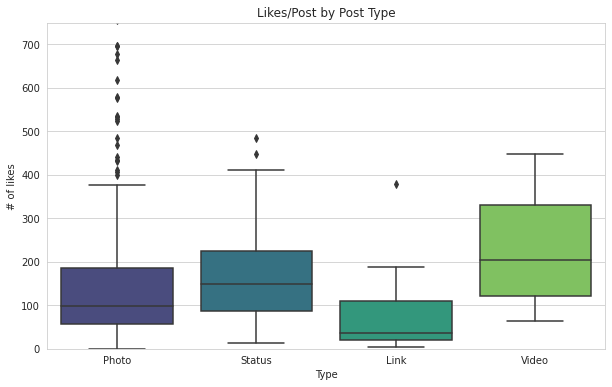

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='like',data=dataset, palette='viridis')
plt.ylim(0,750)
plt.title("Likes/Post by Post Type")
plt.ylabel("# of likes")
plt.savefig('typeBox.png', bbox_inches='tight')
plt.show()

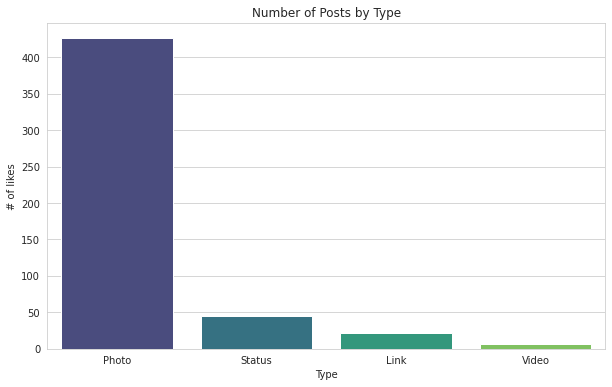

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=dataset,palette='viridis')
plt.title("Number of Posts by Type")
plt.ylabel("# of likes")
plt.savefig('typeCount.png', bbox_inches='tight')
plt.show()

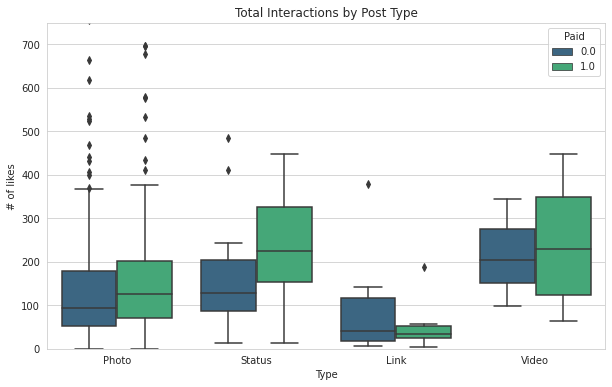

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='like',hue='Paid',data=dataset,palette='viridis')
plt.ylim(0,750)
plt.title("Total Interactions by Post Type")
plt.ylabel("# of likes")
plt.savefig('typePaidBox.png', bbox_inches='tight')
plt.show()

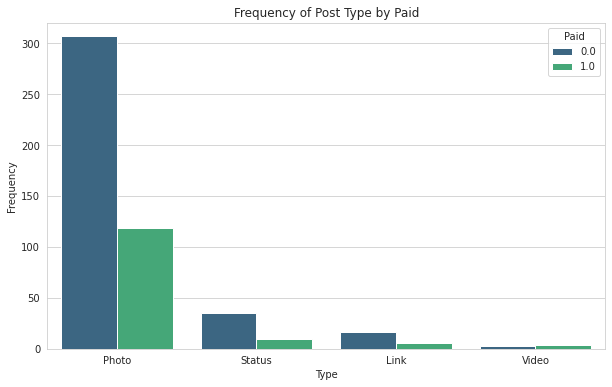

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',hue='Paid',data=dataset,palette='viridis')
plt.ylim(0,320)
plt.title("Frequency of Post Type by Paid")
plt.ylabel("Frequency")
plt.savefig('typePaidCount.png', bbox_inches='tight')
plt.show()

Video posts had the highest mean, median, and percentiles. Photo posts had the largest range, from 0 to 6000

Observations:


1.   On avg videos had higher engagements(likes)
2.   Photo posts had the largest range
3. Links performed the worst, with the lowest mean, range, and median
4. No difference in paid link posts
5. Paid Status Posts had higher likes on average when compared to non-paid status posts
6. Paid Photo Posts performed marginally better than non-paid posts on average, though non-paid posts had a larger range (more outliers)



**Paid Posts vs. Likes**

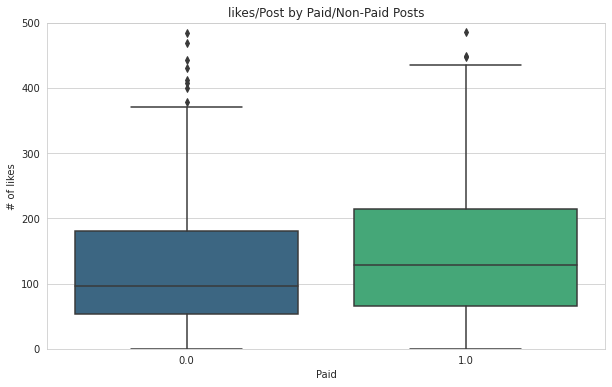

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid',y='like',data=dataset,palette='viridis')
plt.ylim(0,500)
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of likes")
plt.savefig('paidBox.png', bbox_inches='tight')
plt.show()

In [ ]:
print(np.median(dataset[dataset['Paid']==0]['like']))
print(np.median(dataset[dataset['Paid']==1]['like']))

96.0
128.0


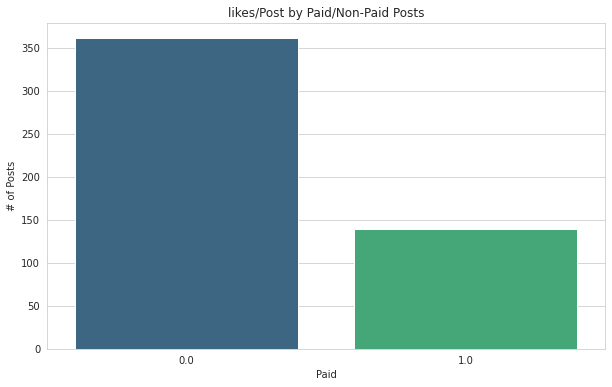

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Paid',data=dataset,palette='viridis')
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of Posts")
plt.savefig('paidCount.png', bbox_inches='tight')
plt.show()

Observations:


1.   There were more non-paid posts than paid posts
2.   Paid posts performed 30 likes by median better than non-paid posts
